<a href="https://colab.research.google.com/github/vitor-yuichi/Tweet_Pluviometer/blob/main/Files/Second_window.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt 
from google.colab import drive
drive.mount('/content/gdrive') 
import numpy as np 
from collections import Counter
import datetime
import seaborn as sns 
import scipy
from matplotlib.lines import Line2D

Mounted at /content/gdrive


# importing and ajusting the date-time

In [ ]:
df1=pd.read_csv(r'/content/gdrive/My Drive/Colab Notebooks/Tweets/re5.csv')
df2=pd.read_csv(r'/content/gdrive/My Drive/Colab Notebooks/Tweets/2019_Mar13-31.csv')
pd.set_option("display.max_rows", 101)

In [ ]:
frames=[df1,df2]
df = pd.concat(frames,ignore_index=True)
df.drop(columns=['id','username', 'retweets','favorites', 'permalink','mentions','hashtags','geo','emojis','lang', 'verified','replyCount','quoteCount'], axis=1, inplace=True)


In [ ]:
df.date=pd.to_datetime(df.date)
df['date'] = df['date'].dt.tz_localize('UTC').dt.tz_convert('America/Sao_Paulo')


In [ ]:
df.sort_values(by='date', inplace=True)
df['Time'] = df['date'].dt.strftime('%H:%M')
df['Date']=df['date'].dt.strftime('%Y-%m-%d')

# Cutting for the temporal window 

In [ ]:
cutfor16_20=df[((df.Time>'14:00') & (df.Time<'20:00'))]
second_twindow=cutfor16_20[((cutfor16_20.Date>='2019-03-01') & (cutfor16_20.Date<='2019-03-31'))]
second_twindow

,date,text,Time,Date
51153,2019-03-01 14:01:25-03:00,Novo quadro da sika_brasil no AR!! 🙌🏻 DUCAS DO...,14:01,2019-03-01
51152,2019-03-01 14:04:24-03:00,#BarVerde #Night #SP #Verdinho em Bar Verde ht...,14:04,2019-03-01
51151,2019-03-01 14:04:29-03:00,O seu condomínio está preparado para o carnava...,14:04,2019-03-01
51150,2019-03-01 14:05:04-03:00,#Repost @Joelma (get_repost)\nA placa de 100 m...,14:05,2019-03-01
51149,2019-03-01 14:06:13-03:00,Novos livros 📚 #stephenhawking #richarddawkins...,14:06,2019-03-01
...,...,...,...,...
79022,2019-03-31 19:56:25-03:00,‘’Os sonhos não determinam aonde vamos chegar ...,19:56,2019-03-31
79021,2019-03-31 19:56:32-03:00,https://t.co/i4NLm7bzyO,19:56,2019-03-31
79020,2019-03-31 19:57:23-03:00,Eu trabalho pra dar uma vida melhor pros meus ...,19:57,2019-03-31
79019,2019-03-31 19:57:49-03:00,Sonho realizado 🖤 \nhttps://t.co/cwlwVrsSMu \n...,19:57,2019-03-31


# Filtering with word list associated to flood (HIDRO/METEO)

In [ ]:
meteo_hidro=['chuva','rain','temporal', 'lightning', 'tempestade','nublado','trovão','rainbow','precipitação','alagado','alagamento','enchente','enxente','inundação','raio']
second_twindow=second_twindow.copy()
second_twindow['text']=second_twindow['text'].str.replace('\.','', regex=True)
second_twindow_filtered=second_twindow[second_twindow.text.str.contains('\W|\W'.join(meteo_hidro), case=False,regex=True)]

second_twindow_filtered


,date,text,Time,Date
51133,2019-03-01 14:18:47-03:00,Sexta feira - Chuva - Gravação do mesmo jeito ...,14:18,2019-03-01
50979,2019-03-01 17:27:13-03:00,Plates of meat 🦶💀 #raiox #xray #saopaulo em La...,17:27,2019-03-01
52091,2019-03-02 14:41:38-03:00,#Frio❄ #Chuva🌦 #Sol☀️ tudo isso em apenas 2...,14:41,2019-03-02
51903,2019-03-02 18:10:53-03:00,Chove chuva! em São Paulo Brazil https://tco/...,18:10,2019-03-02
51898,2019-03-02 18:17:02-03:00,Blooms in the rain 場所: São Paulo Brazil https...,18:17,2019-03-02
51873,2019-03-02 18:48:31-03:00,O chuva quero que caia de vagar! #carnaval #20...,18:48,2019-03-02
51844,2019-03-02 19:14:22-03:00,Passa a chuva aqui em Casarão Augusta https://...,19:14,2019-03-02
51822,2019-03-02 19:47:00-03:00,Na chuva Na rua na fazenda ou numa casinha d...,19:47,2019-03-02
53085,2019-03-03 14:04:31-03:00,Fuga da chuva em Ball Five https://tco/Y2QiSCovHU,14:04,2019-03-03
53036,2019-03-03 14:46:02-03:00,É carnaval bebê ✨ E com essa chuva que está n...,14:46,2019-03-03


# Flood temporal cutting 


In [ ]:
floods=pd.read_csv(r"/content/gdrive/My Drive/Colab Notebooks/Tweets/Alagamentos_corte.csv")
floods

,SEQ,LONG,LAT,LOCAL_ED,LOCALIZACA,REFERENCIA,DATA,MES,H_INICIO,H_FIM,DURACAO,DUR_H,id_estacao,codestacao,latitude,longitude,nome,id_municip,rede,tipoestaca,geocodigo,cidade,xcoord,ycoord
0,7.0,-46.638806,-23.549408,PC DA BANDEIRA,PC DA BANDEIRA,AV VINTE E TRES DE MAIO-CENTROBAIRRO-SE,2019/01/01,1.0,18:34:00,19:23:00,00:49:00,0.82,3809,355030857A,-23.541,-46.629,Centro,2692,CEMADEN,Pluviométrica,3550308,SÃO PAULO,-46.629,-23.541
1,13.0,-46.638580,-23.548910,PC DA BANDEIRA,PC DA BANDEIRA,ALTURA DO NUMERO 27-CENTROBAIRRO-SE,2019/01/03,1.0,17:27:00,17:42:00,00:15:00,0.25,3809,355030857A,-23.541,-46.629,Centro,2692,CEMADEN,Pluviométrica,3550308,SÃO PAULO,-46.629,-23.541
2,14.0,-46.638240,-23.550330,AV VINTE E TRES DE MAIO,AV VINTE E TRES DE MAIO LIBERDADE,PC DA BANDEIRA-SANTANAAEROPORTO-SE,2019/01/03,1.0,19:43:00,20:18:00,00:35:00,0.58,3809,355030857A,-23.541,-46.629,Centro,2692,CEMADEN,Pluviométrica,3550308,SÃO PAULO,-46.629,-23.541
3,15.0,-46.634830,-23.542110,TUN PAPA JOAO PAULO II,TN PAPA JOAO PAULO II REPUBLICA,AV PRESTES MAIA-SANTANAAEROPORTO-SE,2019/01/03,1.0,19:52:00,20:04:00,00:12:00,0.20,3809,355030857A,-23.541,-46.629,Centro,2692,CEMADEN,Pluviométrica,3550308,SÃO PAULO,-46.629,-23.541
4,22.0,-46.629470,-23.540356,R DA CANTAREIRA,R DA CANTAREIRA,AV MERCURIO-BAIRROCENTRO-SE,2019/01/04,1.0,14:45:00,15:03:00,00:18:00,0.30,3809,355030857A,-23.541,-46.629,Centro,2692,CEMADEN,Pluviométrica,3550308,SÃO PAULO,-46.629,-23.541
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
162,1133.0,-46.615697,-23.542419,R JOAQUIM NABUCO,R. JOAQUIM NABUCO,AV RANGEL PESTANA - BAIRRO/CENTRO,2019/12/18,12.0,08:02:00,09:11:00,01:09:00,1.15,3809,355030857A,-23.541,-46.629,Centro,2692,CEMADEN,Pluviométrica,3550308,SÃO PAULO,-46.629,-23.541
163,1134.0,-46.637146,-23.547130,VD DO CHA,VD. DO. CHA,ALTURA DO NUMERO 0 - PATRIARCA/R AZEVEDO,2019/12/18,12.0,13:01:00,13:34:00,00:33:00,0.55,3809,355030857A,-23.541,-46.629,Centro,2692,CEMADEN,Pluviométrica,3550308,SÃO PAULO,-46.629,-23.541
164,1139.0,-46.641155,-23.538239,AV RIO BRANCO,AV. RIO BRANCO (REPUBLICA),R DOS GUSMOES - BAIRRO/CENTRO,2019/12/23,12.0,14:23:00,15:17:00,00:54:00,0.90,3809,355030857A,-23.541,-46.629,Centro,2692,CEMADEN,Pluviométrica,3550308,SÃO PAULO,-46.629,-23.541
165,1140.0,-46.641770,-23.537580,AV RIO BRANCO,AV. RIO BRANCO,R DOS GUSMOES - BAIRRO/CENTRO - â”œÃœNICO,2019/12/23,12.0,14:23:00,15:17:00,00:54:00,0.90,3809,355030857A,-23.541,-46.629,Centro,2692,CEMADEN,Pluviométrica,3550308,SÃO PAULO,-46.629,-23.541


In [ ]:
floods_march=floods[(floods['MES']==3)]
flood_second_twindow=floods_march[((floods_march['H_INICIO']>='16:00:00') & (floods_march['H_INICIO']<='20:00:00'))]


In [ ]:
second_twindow_filtered=second_twindow_filtered.copy()
second_twindow_filtered.Date=pd.to_datetime(second_twindow_filtered.Date)
second_twindow_filtered.Date=second_twindow_filtered.Date.dt.strftime('%Y-%d-%m')

In [ ]:
fidelity_second_twindow=second_twindow_filtered[second_twindow_filtered.Date.isin(pd.to_datetime(flood_second_twindow['DATA']).dt.strftime('%Y-%d-%m'))]

# CSV FILE for second temporal window 

In [ ]:
#Tweets per day 
archive_1=(second_twindow_filtered.Date.value_counts().to_frame().reset_index().sort_values(by='index'))
archive_1

,index,Date
14,2019-01-03,2
5,2019-02-03,6
7,2019-03-03,5
16,2019-04-03,1
12,2019-05-03,2
19,2019-06-03,1
3,2019-07-03,8
1,2019-09-03,11
13,2019-10-03,2
4,2019-11-03,7


In [ ]:
# floods per day
archive_2=pd.to_datetime(flood_second_twindow['DATA']).dt.strftime('%Y-%d-%m').value_counts().to_frame().reset_index().sort_values(by='index')
archive_2

,index,DATA
2,2019-02-03,3
1,2019-05-03,5
0,2019-07-03,6
3,2019-09-03,2
4,2019-19-03,1


In [ ]:
#duration of flood per day 
archive_3=(pd.to_datetime(flood_second_twindow['DATA']).dt.strftime('%Y-%d-%m')).to_frame().join(flood_second_twindow['DUR_H'].astype(float).to_frame()).groupby(['DATA']).sum().reset_index()
archive_3.columns=['index', 'duration']
archive_3

,index,duration
0,2019-02-03,1.59
1,2019-05-03,13.56
2,2019-07-03,9.39
3,2019-09-03,0.60
4,2019-19-03,0.82


In [ ]:
#conc. archives!
archive=archive_1.set_index('index').join(archive_2.set_index('index').join(archive_3.set_index('index'))).fillna(0)
archive.columns=['Tweets Frequence', 'Floods Frequence', 'Duration']
archive

,Tweets Frequence,Floods Frequence,Duration
index,,,
2019-01-03,2,0.0,0.00
2019-02-03,6,3.0,1.59
2019-03-03,5,0.0,0.00
2019-04-03,1,0.0,0.00
2019-05-03,2,5.0,13.56
2019-06-03,1,0.0,0.00
2019-07-03,8,6.0,9.39
2019-09-03,11,2.0,0.60
2019-10-03,2,0.0,0.00


In [ ]:
archive[archive['Floods Frequence']!=0].min()

Tweets Frequence    2.0
Floods Frequence    2.0
Duration            0.6
dtype: float64

#Plots 


In [ ]:
colors=[]
lst_1=archive['Tweets Frequence'].tolist()
lst_2=archive['Floods Frequence'].tolist()
for val in range(0,len(lst_1)):
  if ((lst_1[val]>=6) & (lst_2[val]!=0))==True:
    colors.append('Green')
  elif ((lst_1[val]>=6) & (lst_2[val]==0))==True:
    colors.append('Yellow')
  elif ((lst_1[val]<=6)&(lst_2[val]!=0))==True:
    colors.append('Red')
  else:
    colors.append('white')

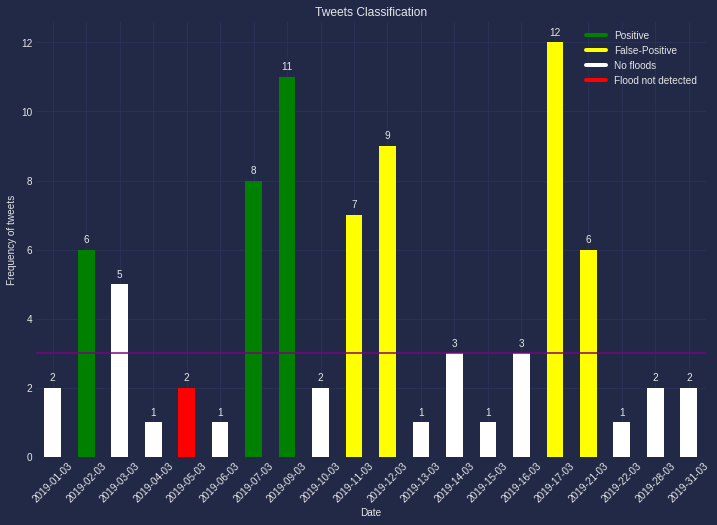

In [ ]:
plt.style.use("seaborn-dark") #estilo cyberpunk

for param in ['figure.facecolor', 'axes.facecolor', 'savefig.facecolor']:
    plt.rcParams[param] = '#212946'
for param in ['text.color', 'axes.labelcolor', 'xtick.color', 'ytick.color']:
    plt.rcParams[param] = '0.9'  # very light grey
ax=archive.plot.bar( y='Tweets Frequence', figsize=(12,8), use_index=True, color=colors, linewidth=0 )
ax.grid(color='#2A3459')
ax.tick_params(axis='x', rotation=45)
ax.axhline(y=3, xmin=0,color='Purple')
ax.set_xlabel("Date")
ax.set_ylabel("Frequency of tweets")
ax.set_title("Tweets Classification")
legend_elements = [Line2D([0], [0], color='green', lw=4, label='Positive'),
                   Line2D([0], [0], color='yellow', lw=4, label='False-Positive'),
                   Line2D([0], [0], color='White', lw=4, label='No floods'),
                   Line2D([0], [0], color='Red', lw=4, label='Flood not detected')]
ax.legend(handles=legend_elements)
for p in ax.patches:
  ax.annotate(np.round(p.get_height(),decimals=2),(p.get_x()+p.get_width()/2., p.get_height()),ha='center', va='center', xytext=(0, 10), textcoords='offset points')

# Temporal Series 

In [ ]:
import re
meteo_hidro
meteo=['chuva', 'rain', 'temporal','lightning', 'tempestade', 'trovão','rainbow','precipitação', 'chovendo']
hidro=['alagado', 'alagamento', 'enchente', 'enxente', 'inundação','raio','alagar']
text_tweet=second_twindow_filtered.text.tolist()

#Frequence of words METEO

In [ ]:
#for METEO words count 
freq_meteo=[0]*len(meteo)
len(text_tweet)
for i in range (0,len(text_tweet)):
  for j in range (0,len(meteo)):
    if re.search(meteo[j], text_tweet[i], re.IGNORECASE)!=None:
      freq_meteo[j]=freq_meteo[j]+1
lists=[meteo, freq_meteo]
freq_meteo_df=pd.concat([pd.Series(x) for x in lists], axis=1)
freq_meteo_df.columns=('words', 'frequence')


In [ ]:
text_data=second_twindow_filtered.Date.tolist()
dictdata=Counter(text_data)
dict_data=pd.DataFrame.from_dict(dictdata, orient='index')
text_data_freq=dict_data[0].tolist()
text_data_freq #number of iterations in each date of tweets 

[2, 6, 5, 1, 2, 1, 8, 11, 2, 7, 9, 1, 3, 1, 3, 12, 6, 1, 2, 2]

In [ ]:
#for METEO
freq_meteo_temporal=[0]*len(text_data_freq)
aux=0
aux1=0
i=0
count=0
while i<len(text_data_freq): 
  for l in range (0, text_data_freq[i]):
    for k in range(0,len(meteo)):
      if (re.search(meteo[k], text_tweet[aux], re.IGNORECASE)!=None):
        count=count+1
    aux=aux+1
    aux1=aux1+1
    if aux1==(text_data_freq[i]):
      freq_meteo_temporal[i]=count
      aux1=0
      count=0
  i=i+1

In [ ]:
archive['METEO']=freq_meteo_temporal
archive

,Tweets Frequence,Floods Frequence,Duration,METEO
index,,,,
2019-01-03,2,0.0,0.00,1
2019-02-03,6,3.0,1.59,6
2019-03-03,5,0.0,0.00,6
2019-04-03,1,0.0,0.00,1
2019-05-03,2,5.0,13.56,2
2019-06-03,1,0.0,0.00,2
2019-07-03,8,6.0,9.39,9
2019-09-03,11,2.0,0.60,12
2019-10-03,2,0.0,0.00,2


In [ ]:
#for HIDRO 
freq_hidro_temporal=[0]*len(text_data_freq)
aux=0
aux1=0
i=0
count=0
while i<len(text_data_freq): 
  for l in range (0, text_data_freq[i]):
    for k in range(0,len(hidro)):
      if (re.search(hidro[k], text_tweet[aux], re.IGNORECASE)!=None):
        count=count+1
    aux=aux+1
    aux1=aux1+1
    if aux1==(text_data_freq[i]):
      freq_hidro_temporal[i]=count
      aux1=0
      count=0
  i=i+1


In [ ]:
archive['HIDRO']=freq_hidro_temporal
archive.METEO.sum()

89

# BOX PLOT 


In [ ]:
floods_days_archive=archive[archive['Floods Frequence']!=0]
no_floods_days_archive=archive[archive['Floods Frequence']==0]

Text(0.5, 1.0, 'Boxplots')

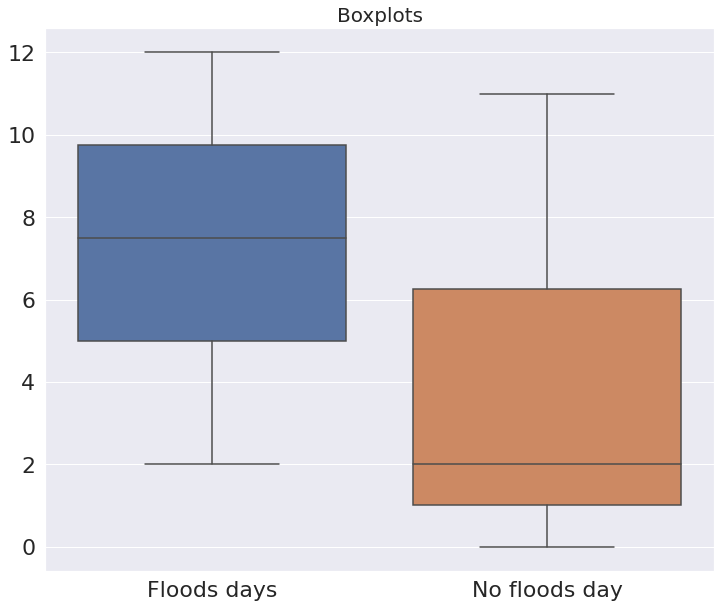

In [ ]:
sns.set_theme(style="whitegrid")
sns.set(rc={'figure.figsize':(12,10)})
sns.set(font_scale = 2)
x_names=['Floods days', 'No floods day']
ax_sns1=sns.boxplot(data=[floods_days_archive['METEO'],no_floods_days_archive['METEO']],  hue_order=x_names)
ax_sns1.set_xticklabels(x_names)
ax_sns1.set_title('Boxplots', fontsize=20)

In [ ]:
archive.to_csv(r'/content/gdrive/My Drive/Colab Notebooks/Tweets/Second_Twindow.csv',index=True)


# Third Window 

In [ ]:
cutfor16_20=df[((df.Time>'14:00') & (df.Time<'20:00'))]
pd.set_option("display.max_rows", 101)
third_twindow=cutfor16_20[((cutfor16_20.Date>='2019-02-01') & (cutfor16_20.Date<='2019-03-31'))]

# Filtering 

In [ ]:
third_twindow=third_twindow.copy()
third_twindow.text=third_twindow.text.str.replace('\.','', regex=True)
third_twindow_filtered=third_twindow[third_twindow.text.str.contains('\W|\W'.join(meteo_hidro), case=False,regex=True)]
third_twindow_filtered

,date,text,Time,Date
27965,2019-02-03 14:14:27-02:00,Parece que não mas choveu \n#Argoth #SantaEfi...,14:14,2019-02-03
27944,2019-02-03 14:44:07-02:00,19:00 daquela Quarta que passou\n#Quarta #wedn...,14:44,2019-02-03
28816,2019-02-04 14:01:53-02:00,Com sol ou chuva é folgaaaaaa!\nHahahaha 🏃‍♂️f...,14:01,2019-02-04
28801,2019-02-04 14:15:16-02:00,MULHER É LEVADA PELA CHUVA FORTE em São Paulo ...,14:15,2019-02-04
28555,2019-02-04 19:16:40-02:00,Edição modo arco-iris 🌈\n#edição #edit #logicp...,19:16,2019-02-04
...,...,...,...,...
70853,2019-03-22 16:18:33-03:00,É luta até debaixo de chuva! em Praça Da Repub...,16:18,2019-03-22
76577,2019-03-28 14:01:29-03:00,#tbt chuva de raio laser #clubculture em São ...,14:01,2019-03-28
76365,2019-03-28 18:32:13-03:00,Eu vejo surgir teus poetas de campos espaços ...,18:32,2019-03-28
79255,2019-03-31 16:03:43-03:00,Uma vez me disseram que dançar na chuva é libe...,16:03,2019-03-31


#Flood Temporal cutting


In [ ]:
floods_fev_mar=floods[((floods['MES']==2) | (floods['MES']==3))]
floods_fev_mar
flood_third_twindow=floods_fev_mar[((floods_fev_mar['H_INICIO']>='16:00:00') & (floods_fev_mar['H_INICIO']<='20:00:00'))]
flood_third_twindow

,SEQ,LONG,LAT,LOCAL_ED,LOCALIZACA,REFERENCIA,DATA,MES,H_INICIO,H_FIM,DURACAO,DUR_H,id_estacao,codestacao,latitude,longitude,nome,id_municip,rede,tipoestaca,geocodigo,cidade,xcoord,ycoord
36,260.0,-46.628260,-23.554520,R GLICERIO,R GLICERIO,ALTURA DO NUMERO 221-UNICO - NAO INFORMADA-SE,2019/02/06,2.0,16:01:00,16:48:00,00:47:00,0.78,3809,355030857A,-23.541,-46.629,Centro,2692,CEMADEN,Pluviométrica,3550308,SÃO PAULO,-46.629,-23.541
37,268.0,-46.627042,-23.543123,AV MERCURIO,AV MERCURIO,PC S VITO-UNICO - ESQUERDA-SE,2019/02/06,2.0,18:36:00,21:50:00,03:14:00,3.23,3809,355030857A,-23.541,-46.629,Centro,2692,CEMADEN,Pluviométrica,3550308,SÃO PAULO,-46.629,-23.541
40,318.0,-46.628561,-23.557195,R TEIXEIRA LEITE,R TEIXEIRA LEITE,R S PAULO-UNICO-SE,2019/02/16,2.0,19:08:00,21:33:00,02:25:00,2.42,3809,355030857A,-23.541,-46.629,Centro,2692,CEMADEN,Pluviométrica,3550308,SÃO PAULO,-46.629,-23.541
41,324.0,-46.629470,-23.540356,AV MERCURIO,AV MERCURIO,R DA CANTAREIRA-UNICO-SE,2019/02/16,2.0,19:37:00,00:00:00,04:23:00,4.38,3809,355030857A,-23.541,-46.629,Centro,2692,CEMADEN,Pluviométrica,3550308,SÃO PAULO,-46.629,-23.541
42,372.0,-46.638910,-23.549790,PC DA BANDEIRA,PC DA BANDEIRA (REPUBLICA),PQ ANHANGABAU - BAIRRO/CENTRO,2019/02/21,2.0,18:55:00,20:02:00,01:07:00,1.12,3809,355030857A,-23.541,-46.629,Centro,2692,CEMADEN,Pluviométrica,3550308,SÃO PAULO,-46.629,-23.541
43,374.0,-46.638820,-23.548270,AV VINTE E TRES DE MAIO,AV VINTE E TRES DE MAIO,AV NOVE DE JULHO - SANTANA/AEROPORTO,2019/02/21,2.0,18:57:00,19:44:00,00:47:00,0.78,3809,355030857A,-23.541,-46.629,Centro,2692,CEMADEN,Pluviométrica,3550308,SÃO PAULO,-46.629,-23.541
44,384.0,-46.624845,-23.533575,AV DO ESTADO,AV DO ESTADO (BOM RETIRO),ALTURA DO Nâ”œÃœMERO 2023 - SANTANA/IPIRANGA,2019/02/21,2.0,19:22:00,22:37:00,03:15:00,3.25,3809,355030857A,-23.541,-46.629,Centro,2692,CEMADEN,Pluviométrica,3550308,SÃO PAULO,-46.629,-23.541
45,392.0,-46.628561,-23.557195,R SAO PAULO,R S PAULO (LIBERDADE),R TEIXEIRA LEITE - UNICO,2019/02/21,2.0,19:34:00,19:53:00,00:19:00,0.32,3809,355030857A,-23.541,-46.629,Centro,2692,CEMADEN,Pluviométrica,3550308,SÃO PAULO,-46.629,-23.541
46,393.0,-46.625495,-23.534161,R JOAO TEODORO,R JOAO TEODORO (BOM RETIRO),AV DO ESTADO - BAIRRO/CENTRO,2019/02/21,2.0,19:35:00,22:36:00,03:01:00,3.02,3809,355030857A,-23.541,-46.629,Centro,2692,CEMADEN,Pluviométrica,3550308,SÃO PAULO,-46.629,-23.541
47,395.0,-46.629470,-23.540356,AV MERCURIO,AV MERCURIO (SE),R DA CANTAREIRA - AMBOS,2019/02/21,2.0,19:37:00,21:03:00,01:26:00,1.43,3809,355030857A,-23.541,-46.629,Centro,2692,CEMADEN,Pluviométrica,3550308,SÃO PAULO,-46.629,-23.541


# FILE for third temporal window 


In [ ]:
pd.to_datetime(flood_third_twindow['DATA']).dt.strftime("%Y-%m-%d")

36    2019-02-06
37    2019-02-06
40    2019-02-16
41    2019-02-16
42    2019-02-21
43    2019-02-21
44    2019-02-21
45    2019-02-21
46    2019-02-21
47    2019-02-21
48    2019-02-21
51    2019-02-24
56    2019-03-02
57    2019-03-02
58    2019-03-02
60    2019-03-05
61    2019-03-05
62    2019-03-05
63    2019-03-05
64    2019-03-05
65    2019-03-07
66    2019-03-07
67    2019-03-07
68    2019-03-07
69    2019-03-07
70    2019-03-07
71    2019-03-09
72    2019-03-09
78    2019-03-19
Name: DATA, dtype: object

In [ ]:
#Tweets per day 
file1=(third_twindow_filtered.Date.value_counts().to_frame().reset_index().sort_values(by='index'))
file2=pd.to_datetime(flood_third_twindow['DATA']).dt.strftime("%Y-%m-%d").value_counts().to_frame().reset_index().sort_values(by='index')
file3=((pd.to_datetime(flood_third_twindow['DATA']).dt.strftime('%Y-%m-%d').to_frame().join(flood_third_twindow['DUR_H'].astype(float).to_frame()))).groupby(['DATA']).sum()
file3=file3.reset_index()
file3.columns=['index', 'duration']
file_third=file1.set_index('index').join(file2.set_index('index').join(file3.set_index('index'))).fillna(0)
file_third.columns=['Tweets Frequence', 'Floods Frequence', 'Duration']
file_third

,Tweets Frequence,Floods Frequence,Duration
index,,,
2019-02-03,2,0.0,0.00
2019-02-04,3,0.0,0.00
2019-02-05,1,0.0,0.00
2019-02-06,9,2.0,4.01
2019-02-11,2,0.0,0.00
2019-02-12,3,0.0,0.00
2019-02-13,2,0.0,0.00
2019-02-14,7,0.0,0.00
2019-02-15,5,0.0,0.00


#Plots 

In [ ]:
colors=[]
lst_1=file_third['Tweets Frequence'].tolist()
lst_2=file_third['Floods Frequence'].tolist()
for val in range(0,len(lst_1)):
  if ((lst_1[val]>=6) & (lst_2[val]!=0))==True:
    colors.append('Green')
  elif ((lst_1[val]>=6) & (lst_2[val]==0))==True:
    colors.append('Yellow')
  elif ((lst_1[val]<=6)&(lst_2[val]!=0))==True:
    colors.append('Red')
  else:
    colors.append('white')

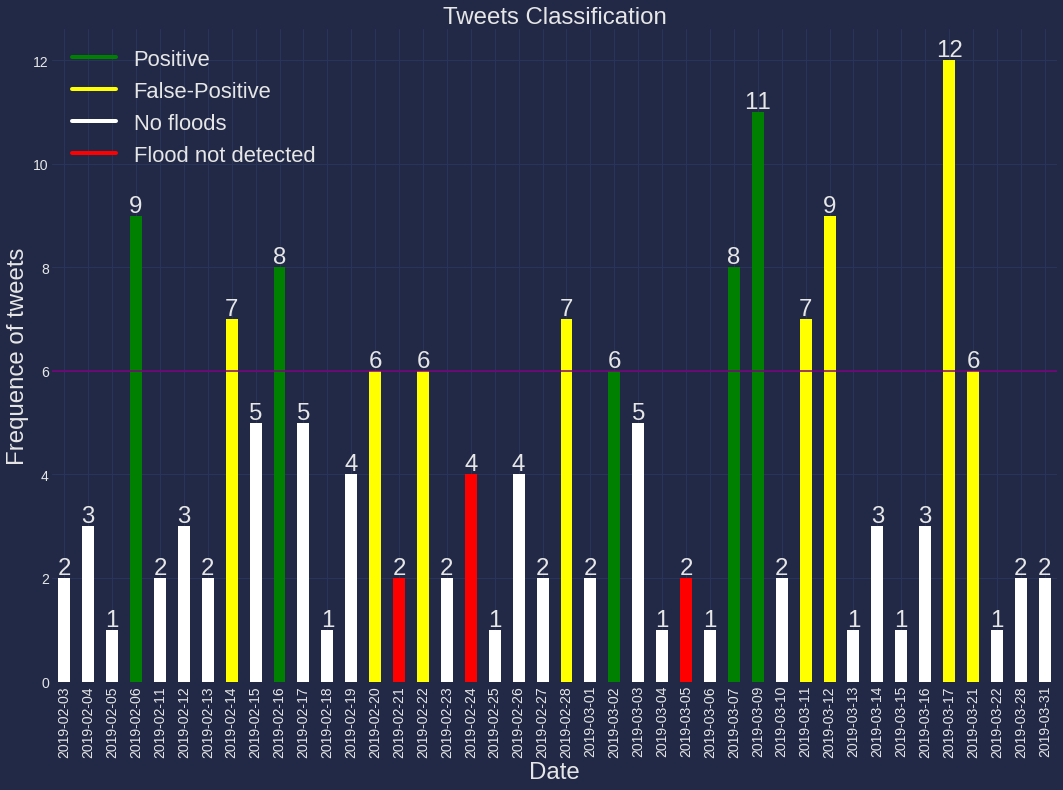

In [ ]:
plt.style.use("seaborn-dark") #estilo cyberpunk

for param in ['figure.facecolor', 'axes.facecolor', 'savefig.facecolor']:
    plt.rcParams[param] = '#212946'
for param in ['text.color', 'axes.labelcolor', 'xtick.color', 'ytick.color']:
    plt.rcParams[param] = '0.9'  # very light grey
ax1=file_third.plot.bar( y='Tweets Frequence', figsize=(18,12), use_index=True, color=colors, linewidth=0 )
ax1.grid(color='#2A3459')
ax1.tick_params(axis='x', rotation=45)
ax1.axhline(y=6, xmin=0,color='Purple')
ax1.set_xlabel("Date")
ax1.set_ylabel("Frequence of tweets")
ax1.set_title("Tweets Classification")
legend_elements = [Line2D([0], [0], color='green', lw=4, label='Positive'),
                   Line2D([0], [0], color='yellow', lw=4, label='False-Positive'),
                   Line2D([0], [0], color='White', lw=4, label='No floods'),
                   Line2D([0], [0], color='Red', lw=4, label='Flood not detected')]
ax1= plt.gca()
ax1.tick_params(axis = 'both', which = 'major', labelsize = 14)
ax1.tick_params(axis = 'both', which = 'minor', labelsize = 14)
ax1.legend(handles=legend_elements)
plt.xticks(rotation=90)
for p in ax1.patches:
  ax1.annotate(np.round(p.get_height(),decimals=2),(p.get_x()+p.get_width()/2., p.get_height()),ha='center', va='center', xytext=(0, 10), textcoords='offset points')

# Temporal Series 

In [ ]:
import re
meteo_hidro
meteo=['chuva', 'rain', 'temporal','lightning', 'tempestade', 'trovão','rainbow','precipitação', 'chovendo']
hidro=['alagado', 'alagamento', 'enchente', 'enxente', 'inundação','raio','alagar']
text_tweet1=third_twindow_filtered.text.tolist()

In [ ]:
text_data1=third_twindow_filtered.Date.tolist()
dictdata1=Counter(text_data1)
dict_data1=pd.DataFrame.from_dict(dictdata1, orient='index')
text_data_freq1=dict_data1[0].tolist()


In [ ]:
#for METEO
freq_meteo_temporal1=[0]*len(text_data_freq1)
aux=0
aux1=0
i=0
count=0
while i<len(text_data_freq1): 
  for l in range (0, text_data_freq1[i]):
    for k in range(0,len(meteo)):
      if (re.search(meteo[k], text_tweet1[aux], re.IGNORECASE)!=None):
        count=count+1
    aux=aux+1
    aux1=aux1+1
    if aux1==(text_data_freq1[i]):
      freq_meteo_temporal1[i]=count
      aux1=0
      count=0
  i=i+1

In [ ]:
file_third['METEO']=freq_meteo_temporal1
file_third

,Tweets Frequence,Floods Frequence,Duration,METEO
index,,,,
2019-02-03,2,0.0,0.00,3
2019-02-04,3,0.0,0.00,4
2019-02-05,1,0.0,0.00,1
2019-02-06,9,2.0,4.01,9
2019-02-11,2,0.0,0.00,3
2019-02-12,3,0.0,0.00,4
2019-02-13,2,0.0,0.00,2
2019-02-14,7,0.0,0.00,7
2019-02-15,5,0.0,0.00,5


In [ ]:
pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_rows', 500)
(third_twindow_filtered[third_twindow_filtered.Date=='2019-03-11']).text

61067          Já passei por tantas tempestades que até perdi o medo da chuva !!! 10 de março  é o Dia do Guitarrista  Salve os guitarristas e suas guitarronas 🙌 \naquele cara ou menina que nos… https://tco/34l95RGOLK
61059      E seguimos alegres tirando onda nesse que é o baile mais TOP do Brasil!\nShow de ontem em SP e mesmo com chuva o povo arrebentou no astral 😄😄😄👏🏿👏🏿👏🏿\n#ObrigadoSenhor\n#AmoMeuTrabalho… https://tco/BoTbFcgK7s
60980                 #breakingnews🚨 12 dead and 6 injured joao doria the governor speaks critical situation in sao paulo 🇧🇷 after temporal Ps: my thoughts and my prayers for all loved ones and… https://tco/UyFC0OIfYS
60961                      🙏\nDiante do Caos MEDITE!\n🙏✨❤️\nSim  ela medita!\nIzabela  4 anos  acordou às 5h para viajar Saiu de Angra dos Reis  debaixo de um super temporal  passou por Resende… https://tco/WKf25zvDBa
60959                     Boa tarde galera E em Sao Paulo  a chuva causando estragos E já já  ela chega de novo Cuidado nas ruas

# BOXPLOT


Text(0.5, 1.0, 'Boxplots')

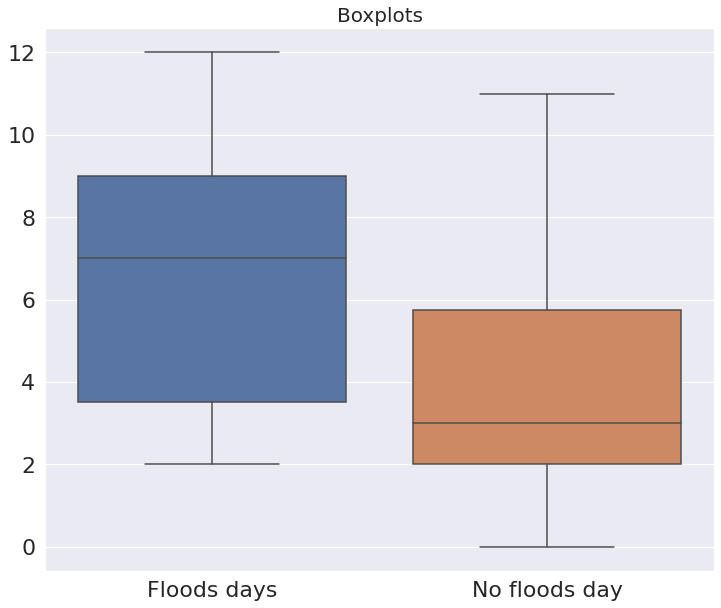

In [ ]:
floods_days_archive=file_third[file_third['Floods Frequence']!=0]
no_floods_days_archive=file_third[file_third['Floods Frequence']==0]
sns.set_theme(style="whitegrid")
sns.set(rc={'figure.figsize':(12,10)})
sns.set(font_scale = 2)
x_names=['Floods days', 'No floods day']
ax_sns2=sns.boxplot(data=[floods_days_archive['METEO'],no_floods_days_archive['METEO']],  hue_order=x_names)
ax_sns2.set_xticklabels(x_names)
ax_sns2.set_title('Boxplots', fontsize=20)

In [ ]:
file_third.to_csv(r'/content/gdrive/My Drive/Colab Notebooks/Tweets/Third_Twindow.csv',index=True)


#Fourth Window

#Temporal cut

In [ ]:
cutfor16_20=df[((df.Time>'14:00') & (df.Time<'20:00'))]
four_window=cutfor16_20
four_window

,date,text,Time,Date
348,2019-01-01 14:01:40-02:00,Nosso Ano Novo nosso novo começo sempre juntos graças ao bom Deus 🙏🏼 masss faltaram minggauzinha a Sttellitta o Carlos a @_marirod e a Thamelia!! Mas vcs estavam presentes em… https://t.co/BtJq2UmTnJ,14:01,2019-01-01
347,2019-01-01 14:02:14-02:00,HAPPY NEW YEAR 🎊🍾 🥂✨\nA year full of love prosperity and lots of empathy. #peace em Lions Nightclub https://t.co/Z9lE5WYBSh,14:02,2019-01-01
346,2019-01-01 14:02:39-02:00,Vestida para romper. By lany_lourenco 🌹💙😍 em São Paulo Brazil https://t.co/NhwWRuOwSO,14:02,2019-01-01
345,2019-01-01 14:02:42-02:00,Happy New Year from the Curry's home! 😜🤙\nMay 2019 bring all the happiness and peace for you surface dweller folks!\n - King Arthur (aquamatheus) Queen Mera (@Koizumi_Risa) and Princess… https://t.co/Wp3Rkvy6uG,14:02,2019-01-01
344,2019-01-01 14:06:03-02:00,🎡 em Teatro Oficina Uzona Uzyna https://t.co/1Z39jjJdnO,14:06,2019-01-01
...,...,...,...,...
79022,2019-03-31 19:56:25-03:00,‘’Os sonhos não determinam aonde vamos chegar mas produzem a força necessária para nos tirar do lugar onde estamos.’’-Augusto Cury #biomecanic… https://t.co/TRueuSib6M,19:56,2019-03-31
79021,2019-03-31 19:56:32-03:00,https://t.co/i4NLm7bzyO,19:56,2019-03-31
79020,2019-03-31 19:57:23-03:00,Eu trabalho pra dar uma vida melhor pros meus gatos. https://t.co/DseqRMsEVJ,19:57,2019-03-31
79019,2019-03-31 19:57:49-03:00,Sonho realizado 🖤 \nhttps://t.co/cwlwVrsSMu \n•\n•\n•\n•\n•\n•\n•\n•\n•\n•\n•\n•\n•\n•\n•\n•\n#makeuptutorial #me #girl #maquiagem #maquiagembrasil #makeup #makeuptutorial #makes… https://t.co/DN8aYoX2Vv,19:57,2019-03-31


#Filtering for meteo-hidro 

In [ ]:
four_window['text']=four_window['text'].str.replace('\.','', regex=True)
four_window=four_window.copy()
four_window_filtered=four_window[four_window.text.str.contains('\W|\W'.join(meteo_hidro), case=False,regex=True)]
four_window_filtered

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,date,text,Time,Date
214,2019-01-01 16:58:21-02:00,'O que dizer da chuva já que todas às palavras já foram usadas no vídeo que acabei de gravar; no vazio que vem com o que deixamos no passado agora o ser limpo de tudo segue em… https://tco/oxdv1RFICS,16:58,2019-01-01
100,2019-01-01 19:33:49-02:00,35’ de natação antes da chuva \n#personaltrainer #personaltraining #mundobt #bodytech #btjardins #bteldorado #bodytecheldorado #btjk #bodytechjk #bodytechjkiguatemi… https://tco/BPm81Pjk5Y,19:33,2019-01-01
1956,2019-01-03 18:09:52-02:00,Sábado tem lacre na termasrainbowoficial e vai ser delicia em Termas Rainbow https://tco/Vgb6M2pPSD,18:09,2019-01-03
2760,2019-01-04 14:31:35-02:00,Trabalhando com chuva\nRefrescoooou em São Paulo Brazil https://tco/nP7dEqhND1,14:31,2019-01-04
2648,2019-01-04 17:40:21-02:00,Ôh chuva ⛈️\nSou bom pra caralho no violão comenta ai que eu deixo\nEscuta meu EP '4 Elementos' e medite\n#falamansa #chuvaemsp #terradagaroa #vozeviolao #bomdemais #4Elementos em São… https://tco/ntJoyrb5bo,17:40,2019-01-04
3384,2019-01-05 16:02:14-02:00,#Relax #saturday #Ubatuba #instagood #instamood #relaxar #desestressando #chill #picoftheday #SP #sampa #ubachuva #ubachuvasemchuva #saopaulo #beach #praia #ubatubabeach #ubatubasp #brazil… https://tco/Ds5QPlvymR,16:02,2019-01-05
3252,2019-01-05 19:07:16-02:00,》Expectativa: curtindo um suco de melancia e apreciando o Sol🌞\n》Realidade: faxinando a casa e esperando a chuva passar!🌦\n#tpmbasica #fashionaddict #watermelon… https://tco/JmoKDJ4j61,19:07,2019-01-05
4940,2019-01-07 14:07:44-02:00,“Assim como o sol retoma com o seu brilho após a tempestade você encontrará luz após a escuridão” 💗🌻 \n#2019 #Janeiro #Segunda (7/365) em São Paulo Brazil https://tco/rjDOqwojIY,14:07,2019-01-07
4909,2019-01-07 14:38:37-02:00,Faça sol ou chuva a thexxlco continuar de péafinal de contas já são dezenove anos de tradição!!!!! em São Paulo Brazil https://tco/cVThjftCbE,14:38,2019-01-07
4843,2019-01-07 15:58:37-02:00,🔥CHUVA DE SEGUIDORES 11 4 MIL🔥\n#followforfollow #followmeto… https://tco/iJ6zGbC8gA,15:58,2019-01-07


#flood

In [ ]:
flood_four=floods[(floods['H_INICIO']>='16:00:00')&(floods['H_INICIO']<='20:00:00')]
floods_four=flood_four[((flood_four['MES']==2) | (flood_four['MES']==3) | (flood_four['MES']==1))]


# CSV FILES 

In [ ]:
file1=(four_window_filtered.Date.value_counts().to_frame().reset_index().sort_values(by='index'))
file2=pd.to_datetime(floods_four['DATA']).dt.strftime("%Y-%m-%d").value_counts().to_frame().reset_index().sort_values(by='index')
file3=((pd.to_datetime(floods_four['DATA']).dt.strftime('%Y-%m-%d').to_frame().join(floods_four['DUR_H'].astype(float).to_frame()))).groupby(['DATA']).sum()
file3=file3.reset_index()
file3.columns=['index', 'duration']
file_four=file1.set_index('index').join(file2.set_index('index').join(file3.set_index('index'))).fillna(0)
file_four.columns=['Tweets Frequence', 'Floods Frequence', 'Duration']
file_four

,Tweets Frequence,Floods Frequence,Duration
index,,,
2019-01-01,2,1.0,0.82
2019-01-03,1,3.0,1.03
2019-01-04,2,1.0,1.63
2019-01-05,2,0.0,0.00
2019-01-07,5,0.0,0.00
2019-01-08,5,2.0,2.22
2019-01-09,2,0.0,0.00
2019-01-11,3,0.0,0.00
2019-01-12,2,0.0,0.00


#PLOTS 

In [ ]:
colors=[]
lst_1=file_four['Tweets Frequence'].tolist()
lst_2=file_four['Floods Frequence'].tolist()
for val in range(0,len(lst_1)):
  if ((lst_1[val]>=6) & (lst_2[val]!=0))==True:
    colors.append('Green')
  elif ((lst_1[val]>=6) & (lst_2[val]==0))==True:
    colors.append('Yellow')
  elif ((lst_1[val]<=6)&(lst_2[val]!=0))==True:
    colors.append('Red')
  else:
    colors.append('white')

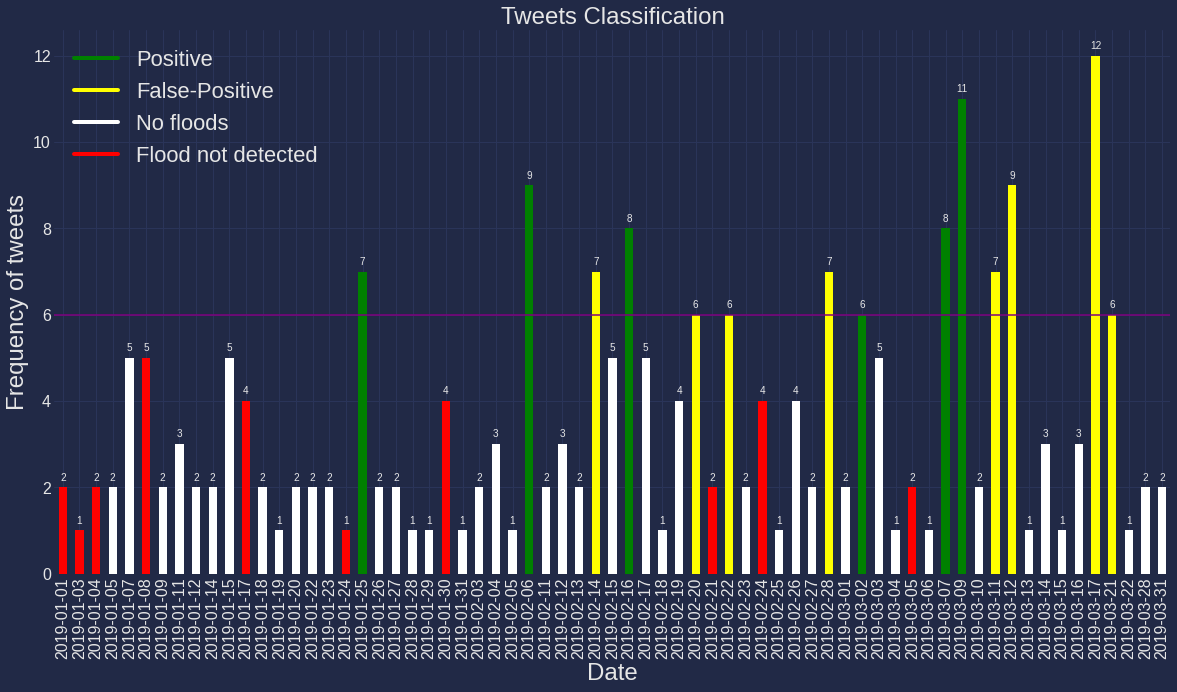

In [ ]:
plt.style.use("seaborn-dark") #estilo cyberpunk

for param in ['figure.facecolor', 'axes.facecolor', 'savefig.facecolor']:
    plt.rcParams[param] = '#212946'
for param in ['text.color', 'axes.labelcolor', 'xtick.color', 'ytick.color']:
    plt.rcParams[param] = '0.9'  # very light grey
ax8=file_four.plot.bar( y='Tweets Frequence', figsize=(20,10), use_index=True, color=colors, linewidth=0 )
ax8.grid(color='#2A3459')
ax8.tick_params(axis='x', rotation=90)
ax8.axhline(y=6, xmin=0,color='Purple')
ax8.set_xlabel("Date")
ax8.set_ylabel("Frequency of tweets")
ax8.set_title("Tweets Classification")
legend_elements = [Line2D([0], [0], color='green', lw=4, label='Positive'),
                   Line2D([0], [0], color='yellow', lw=4, label='False-Positive'),
                   Line2D([0], [0], color='White', lw=4, label='No floods'),
                   Line2D([0], [0], color='Red', lw=4, label='Flood not detected')]
ax8.legend(handles=legend_elements)
ax8= plt.gca()
ax8.tick_params(axis = 'both', which = 'major', labelsize = 16)
ax8.tick_params(axis = 'both', which = 'minor', labelsize = 16)
for p in ax8.patches:
  ax8.annotate(np.round(p.get_height(),decimals=2),(p.get_x()+p.get_width()/2., p.get_height()),ha='center', va='center', xytext=(0, 10), textcoords='offset points', fontsize=10)

#Temporal Series 

In [ ]:
text_tweet1=four_window_filtered.text.tolist()

In [ ]:
text_data1=four_window_filtered.Date.tolist()
dictdata1=Counter(text_data1)
dict_data1=pd.DataFrame.from_dict(dictdata1, orient='index')
text_data_freq1=dict_data1[0].tolist()

In [ ]:
#for METEO
freq_meteo_temporal1=[0]*len(text_data_freq1)
aux=0
aux1=0
i=0
count=0
while i<len(text_data_freq1): 
  for l in range (0, text_data_freq1[i]):
    for k in range(0,len(meteo)):
      if (re.search(meteo[k], text_tweet1[aux], re.IGNORECASE)!=None):
        count=count+1
    aux=aux+1
    aux1=aux1+1
    if aux1==(text_data_freq1[i]):
      freq_meteo_temporal1[i]=count
      aux1=0
      count=0
  i=i+1

In [ ]:
file_four['METEO']=freq_meteo_temporal1
file_four

,Tweets Frequence,Floods Frequence,Duration,METEO
index,,,,
2019-01-01,2,1.0,0.82,3
2019-01-03,1,3.0,1.03,2
2019-01-04,2,1.0,1.63,2
2019-01-05,2,0.0,0.00,2
2019-01-07,5,0.0,0.00,5
2019-01-08,5,2.0,2.22,6
2019-01-09,2,0.0,0.00,2
2019-01-11,3,0.0,0.00,4
2019-01-12,2,0.0,0.00,4


#BOXPLOT

[Text(0, 0, 'Floods days'), Text(0, 0, 'No floods day')]

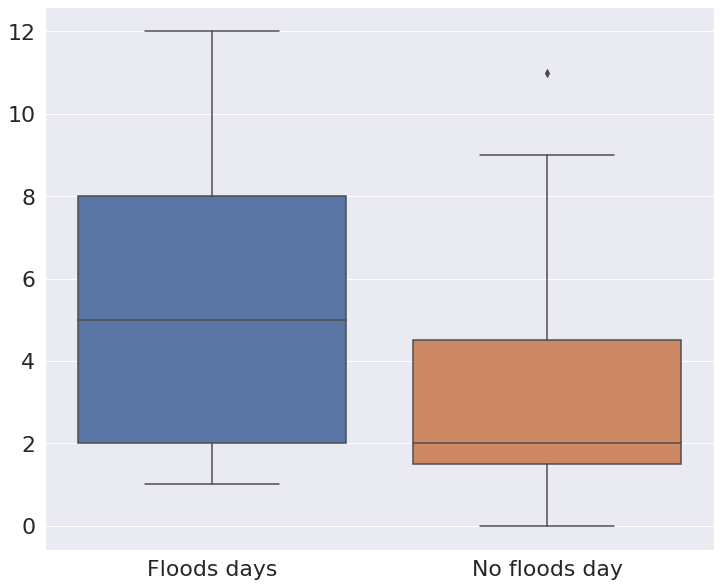

In [ ]:
floods_days_archive=file_four[file_four['Floods Frequence']!=0]
no_floods_days_archive=file_four[file_four['Floods Frequence']==0]
sns.set_theme(style="whitegrid")
sns.set(rc={'figure.figsize':(12,10)})
sns.set(font_scale = 2)
x_names=['Floods days', 'No floods day']
ax9_sns2=sns.boxplot(data=[floods_days_archive['METEO'],no_floods_days_archive['METEO']],  hue_order=x_names)
ax9_sns2.set_xticklabels(x_names)

In [ ]:
file_four.to_csv(r'/content/gdrive/My Drive/Colab Notebooks/Tweets/Fourth_Twindow.csv',index=True)